In [1]:
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(15,6)})

In [2]:
#sudo apt-get 
#!pip install graphviz

In [3]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})

data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [4]:
clf=tree.DecisionTreeClassifier(criterion='entropy')

In [5]:
clf

DecisionTreeClassifier(criterion='entropy')

In [6]:
X=data[['X_1','X_2']]
y=data.Y

In [7]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [8]:
from IPython.display import SVG
from  graphviz import Source
from IPython.display import display

In [9]:
from IPython.display import HTML
style = '<style>svg{width:70% !important;height:70% !important;}</style>'

HTML(style)



In [10]:
graph = Source(tree.export_graphviz(clf, out_file=None,
    feature_names=list(X),
    class_names=['Negative', 'Positive'],
    filled=True))

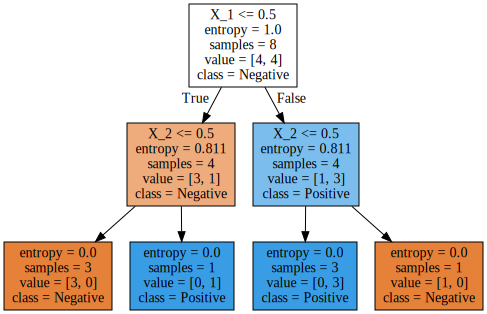

In [11]:
display(SVG(graph.pipe(format='svg')))

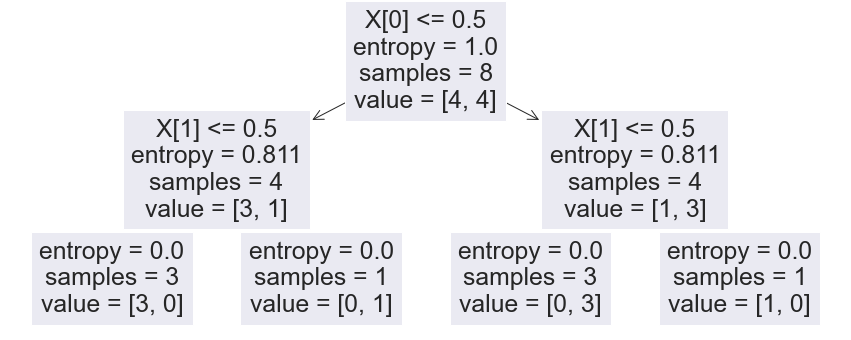

In [12]:
tree.plot_tree(clf.fit(X,y));

## Энтропия

При дисбалансе (или разбалансиорованных) классов - энтропия стремится к нулю (например, когда все только выживышие или все только погибшие)
При равных классах энтропия стремится к 1/2 (для двух классов)


Энтропия - мера беспорядка. Чем выше энтропия, тем хуже получается разделить классы.

В бинарном классификации энтропия находится от 0 до 1.

0 - Когда классы можно однозначно разделить

1 - Когда полный хаус и нет представления как разделить классы

S0 - в формулах обозначается как полная энтропия,

S1,S2 - в формулах обозначается как условная энтропия, для конкретного условия разделения выборки (X <=12)

E(S) это тоже самое, что и S0

Формула энтропии из математики
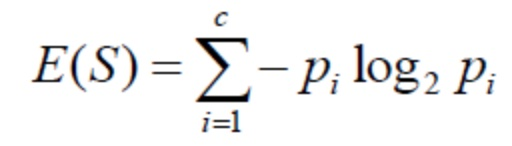

E(S) - полная энтропия, вычисляется изначально перед классификацией.

Формула энтропия для нашего случая с бинарной классификацией

E(S) = -p *log2(p) - (1 - p) * log2(1 - p)

p - это отношение количества элементов 1 класса к сумме всех элементов обоих классов

 

Пример с шариками на координатной прямой




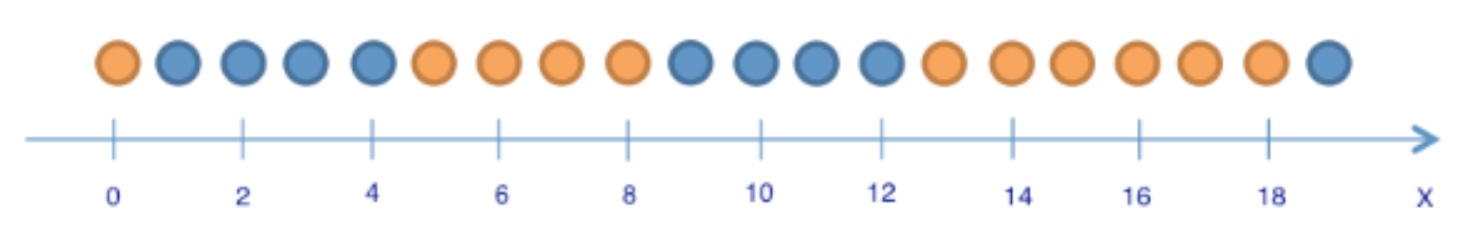

В этом случае сумма всех элементов обоих классов = 20

1 класс будет синие шары, 2 класс оранжевые

1 класс 9 шаров, 2 класс 11 шаров

Подставим в формулу



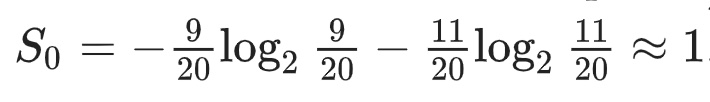

E(S/X) - условная энтропия, вычисляется после разделения по признаку на выборки, чтобы дальше использовать для оценки прироста информации.

E(S/X) = ( n1 / N ) * E1 + ( n2 / N ) * E2

n1,2 - количество наблюдений разделивших по условию

N - общее количество наблюдений

E1,2 - условная энтропия, считается для конкретной выборки

 

Пример, разделим шарики по условию X =< 12



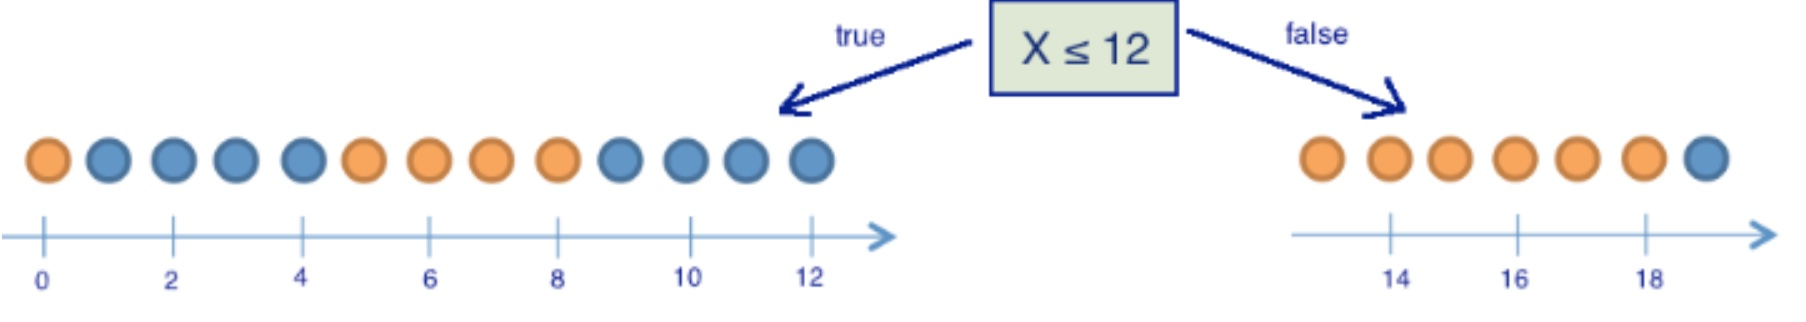
В левой группе оказалось 13 шаров, из которых 8 синих и 5 желтых. Энтропия этой группы равна



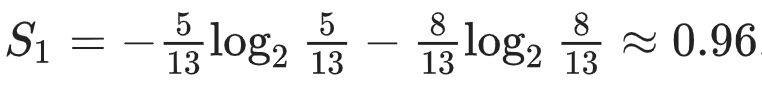
В правой группе оказалось 7 шаров, из которых 1 синий и 6 желтых. Энтропия правой группы равна



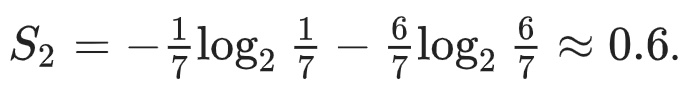

Как видим, энтропия уменьшилась в обеих группах по сравнению с начальным состоянием, хоть в левой и не сильно.

 

Поскольку энтропия – по сути степень хаоса (или неопределенности) в системе, уменьшение энтропии называют приростом информации.

Формула прироста информации в математике



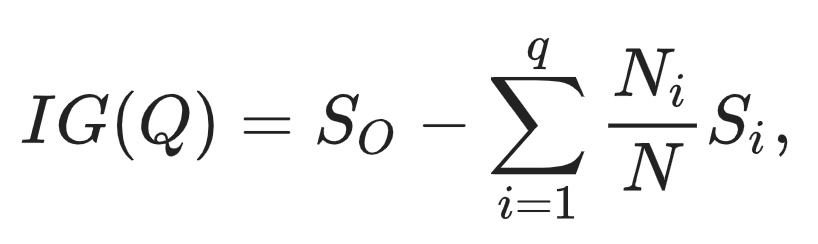

Для нашего случая бинарной классификации

Прирост информации = Полная энтропия - Условная энтропия

IG = E(S) - E(S/X)

Пример подсчета прироста информации при условии разделения шариков Х =<12



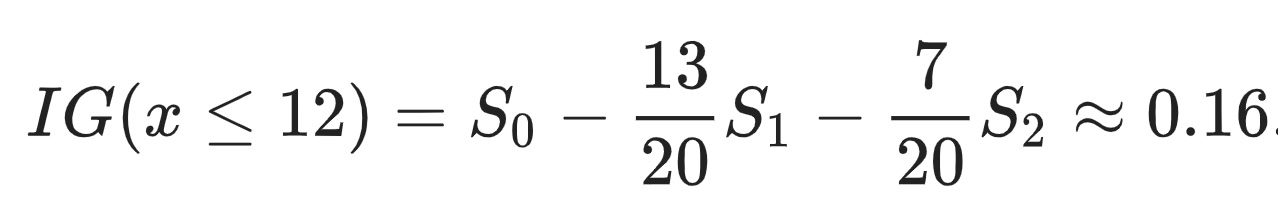

Взяли полную энтропию, отняли из нее первый случай условной энтропии умноженное на отношение шаров 1 класса к общей сумме шаров и отняли второй случай энтропии умноженный на отношение шаров 2 класса к общей сумме шаров. Все логично.

Получили прирост информации в 0.16

 

Для понимания,  энтропия группы с шариками одного цвета равна 0 

Подставляем в формулу E(S) = -p *log2(p) - (1 - p) * log2(1 - p) , допустим 10 шаров одинакового цвета, соответственно сумма всех шаров 10, получаем отношение 10/10

log2(1) = 0, что соответствует представлению, что группа шариков одного цвета – упорядоченная.

 

п.с Статья https://habr.com/ru/company/ods/blog/322534/#derevo-resheniy + добавил свои комментария



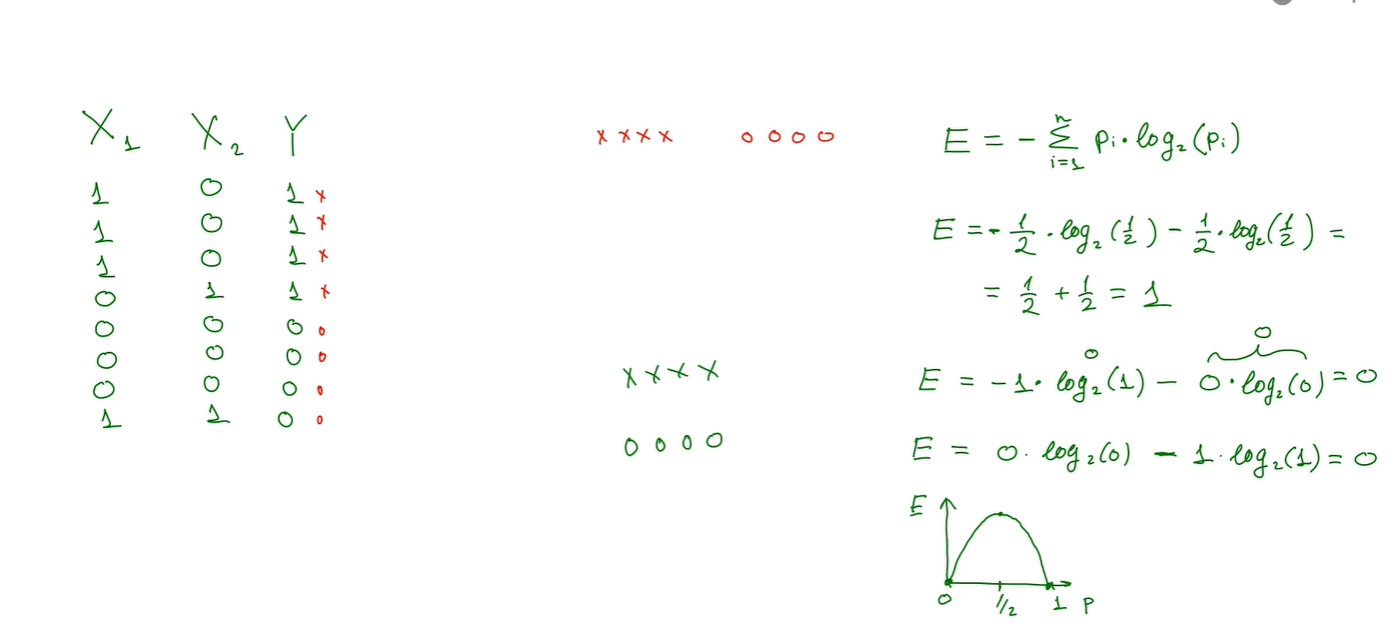

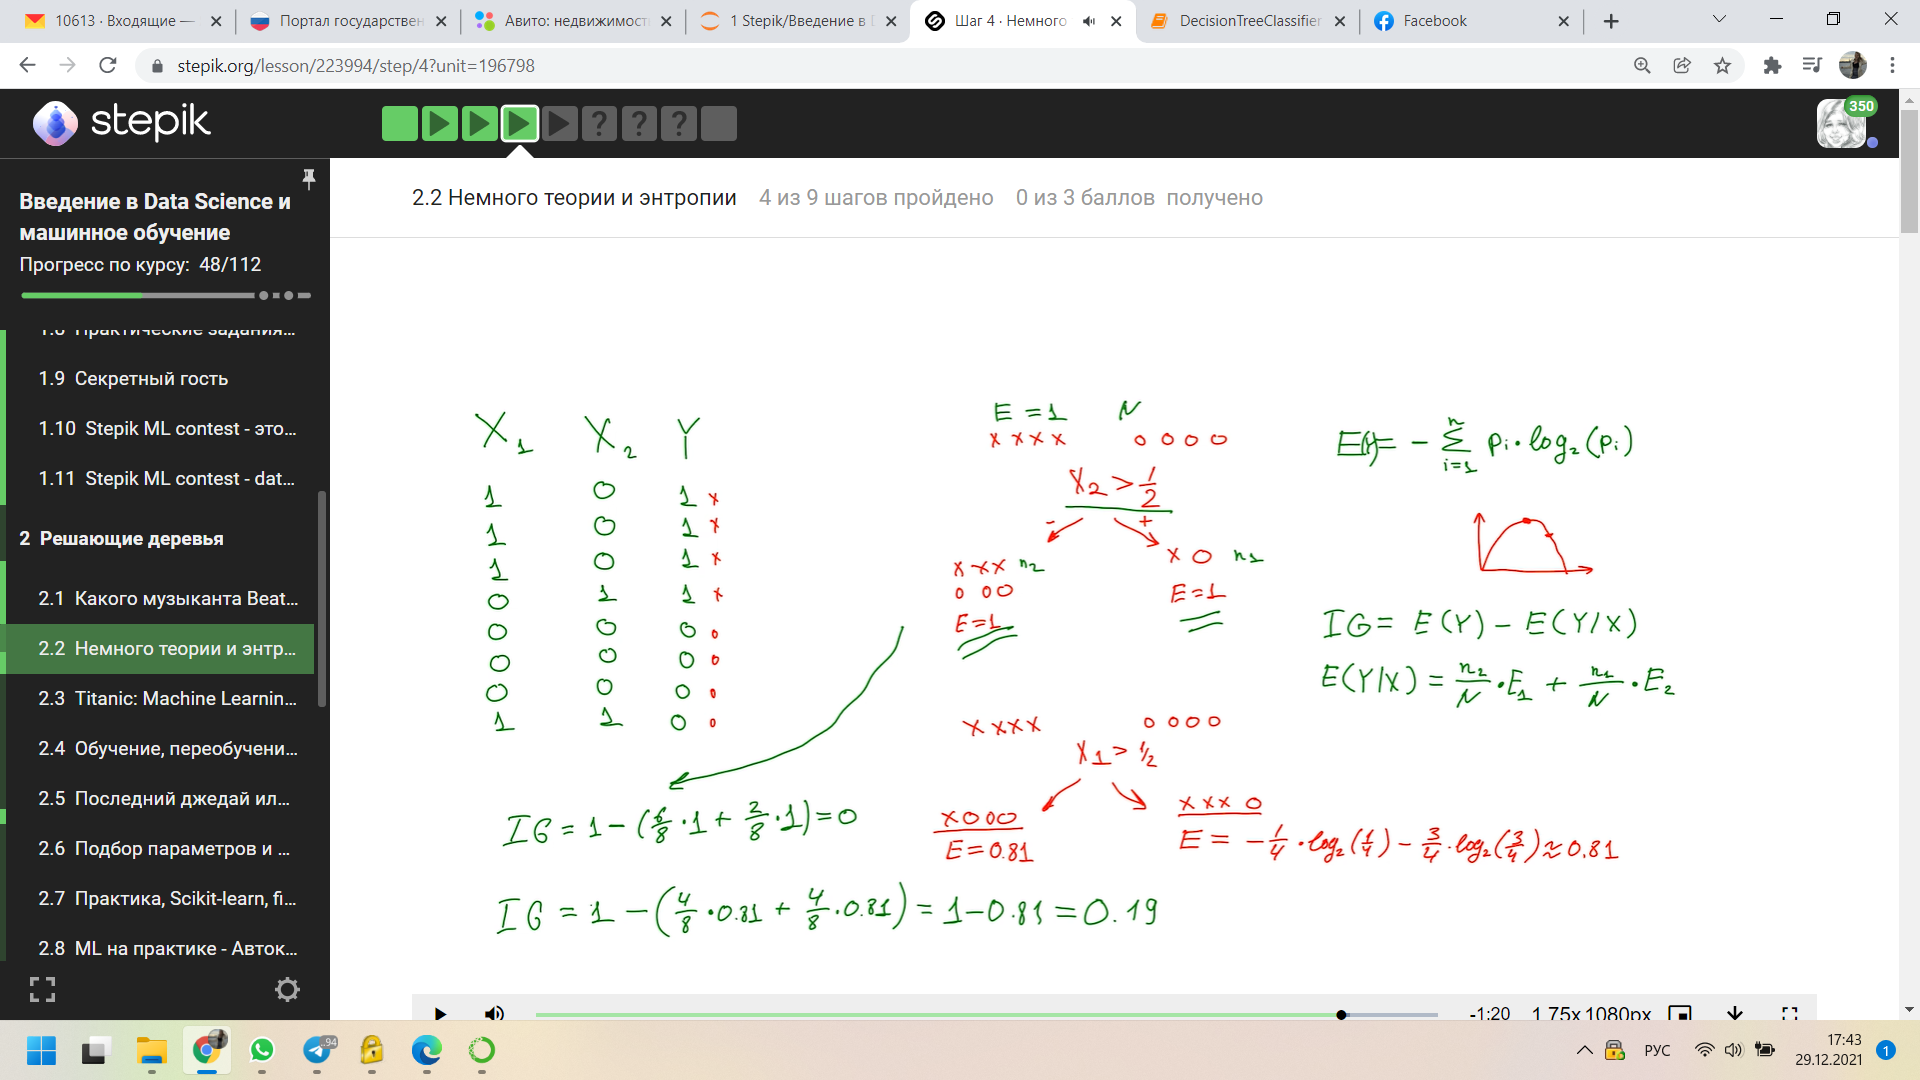

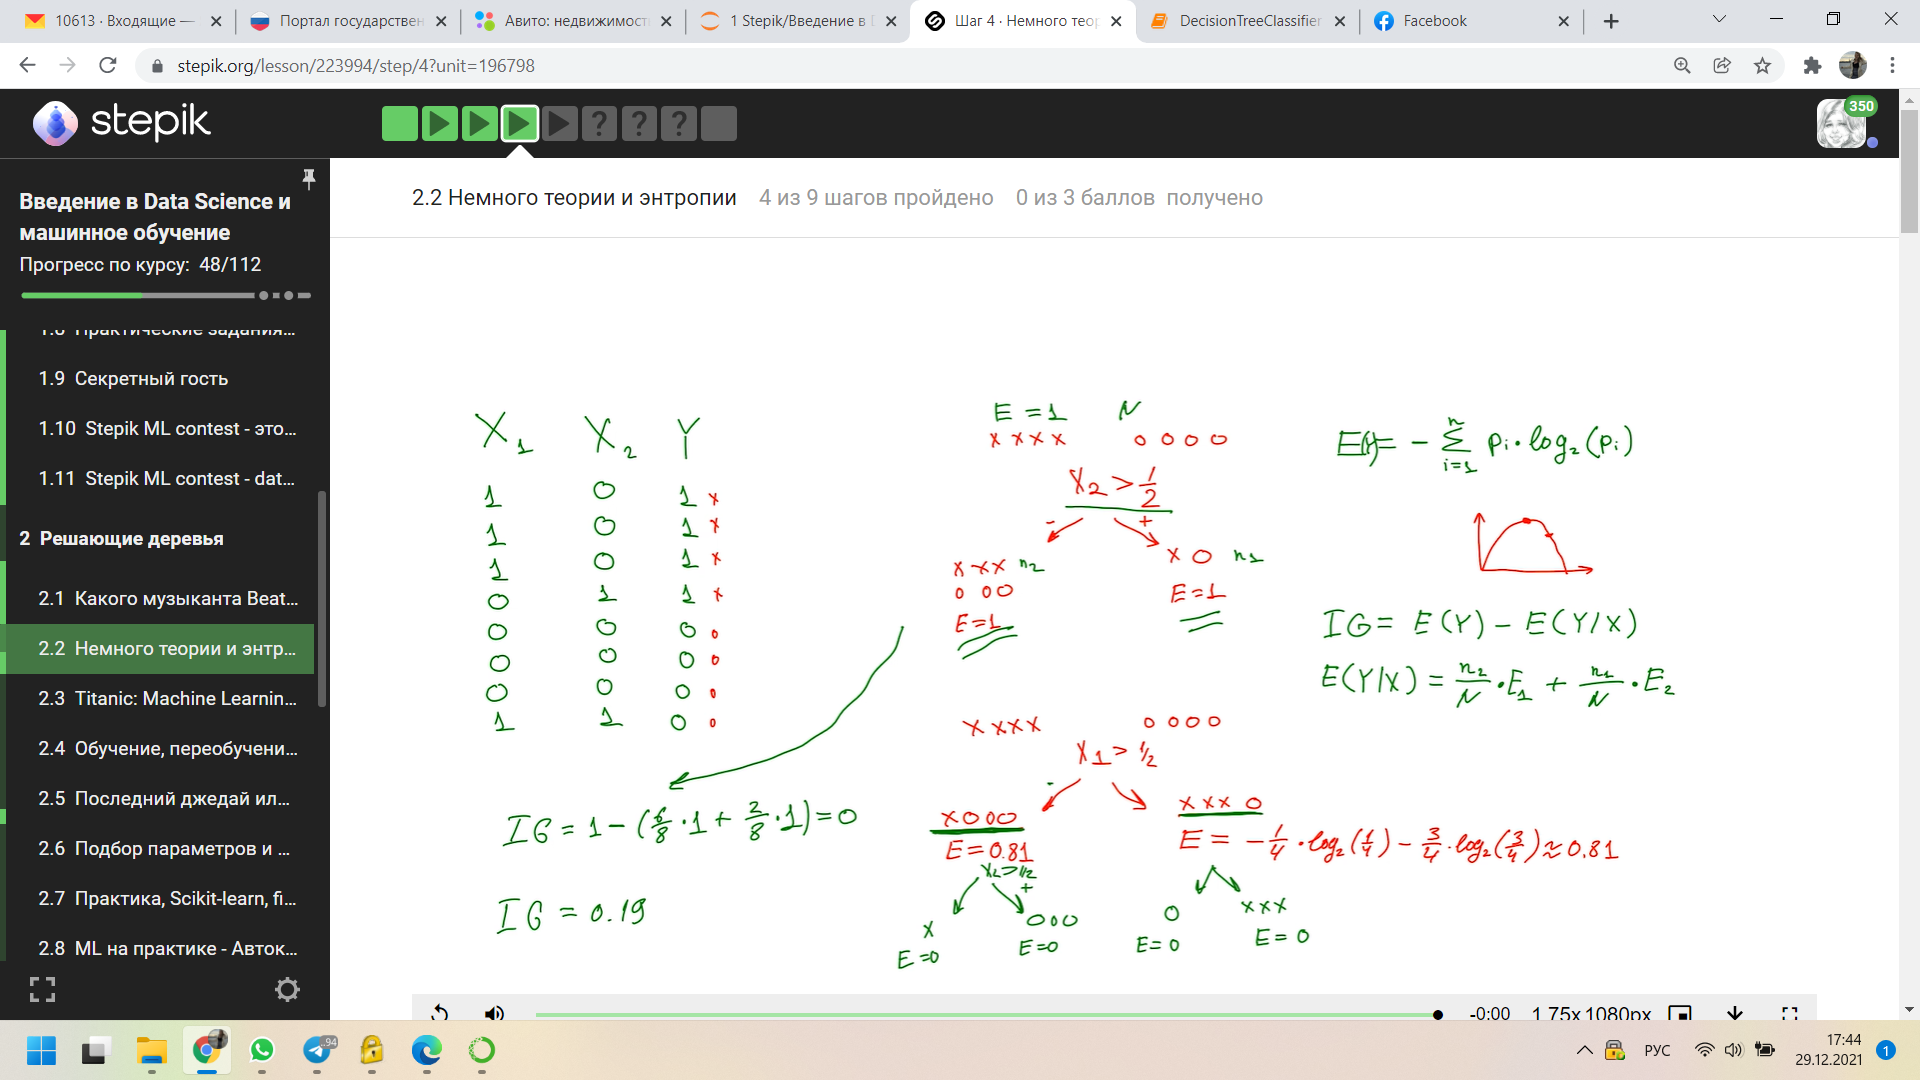

#### Задача на расчёт энтропии

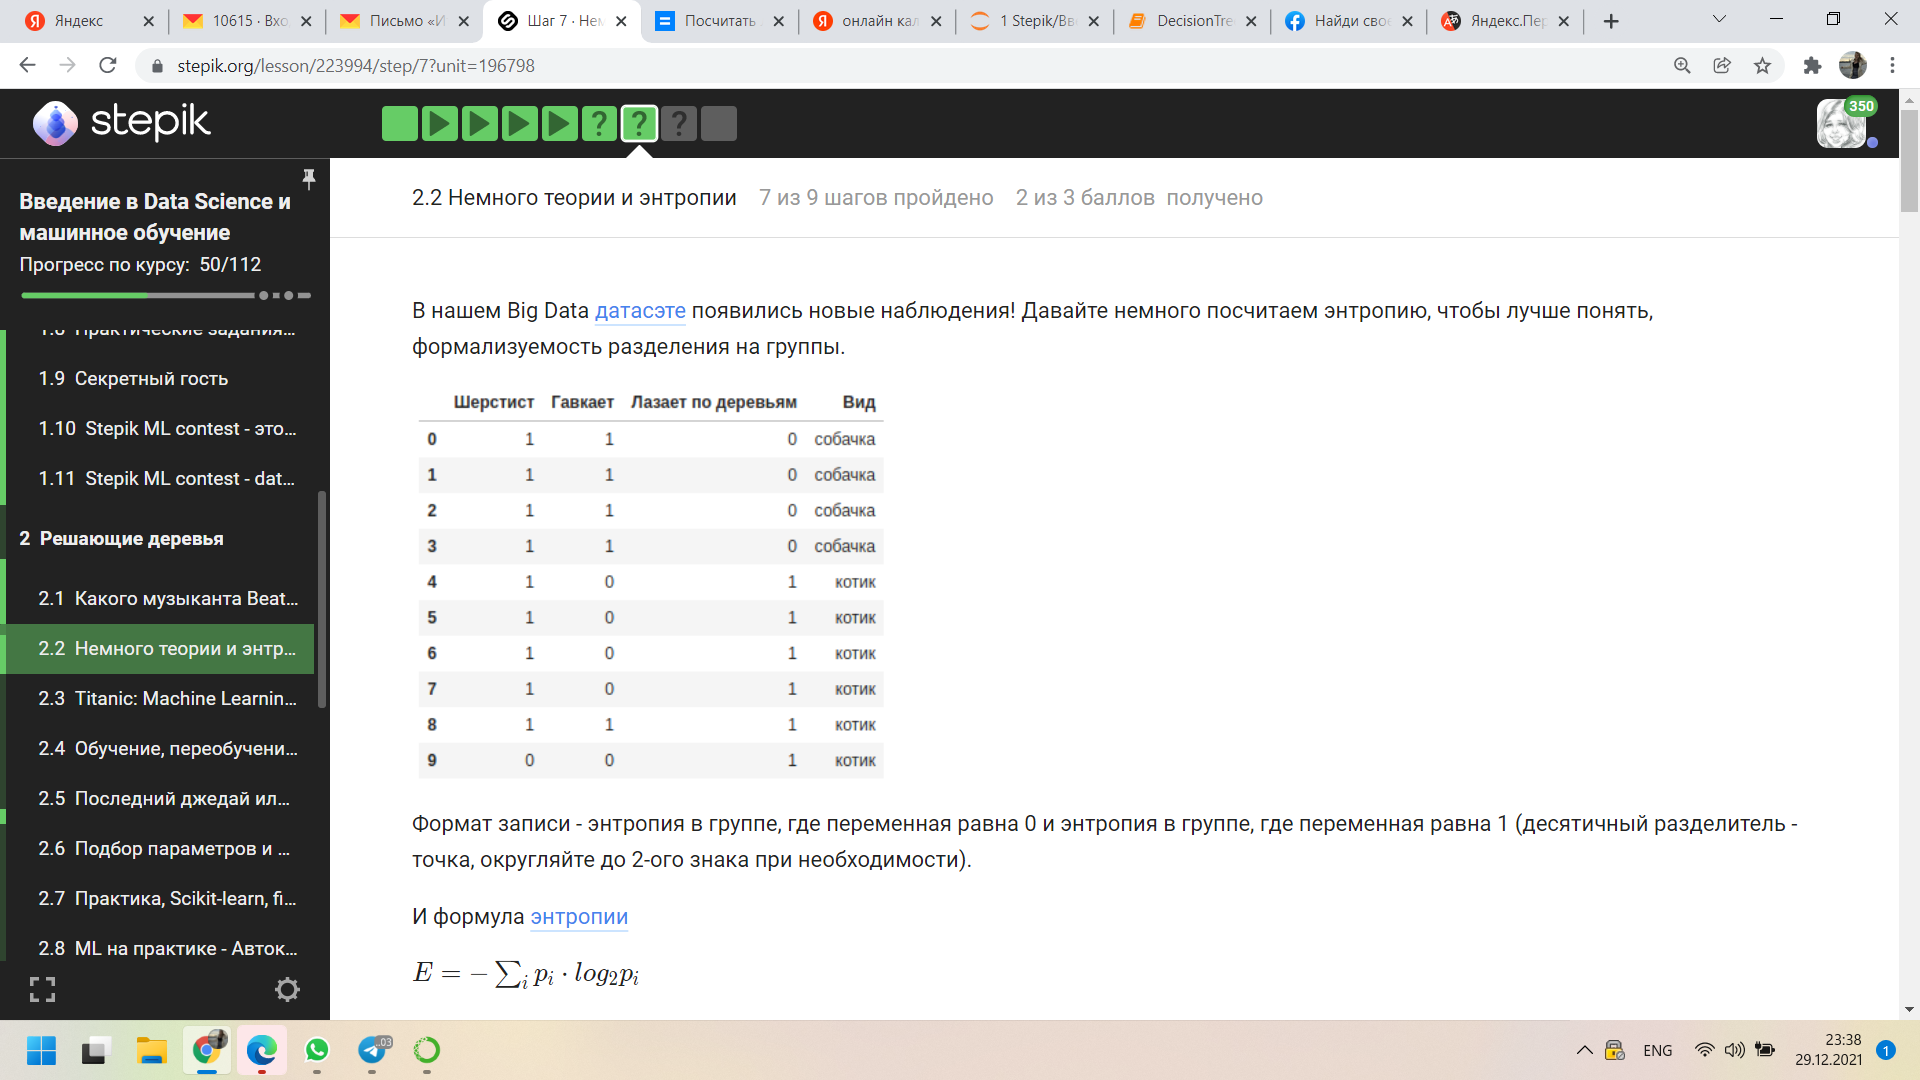

In [13]:
data2 = pd.DataFrame({'X_1': [1, 1, 1,1, 1, 1,1, 1, 1,0], 'X_2': [1, 1, 1,1,0, 0, 0,0, 1, 0], 'X_3':[0, 0, 0,0,1, 1, 1,1,1,1] ,'Y': [0, 0, 0, 0,1, 1, 1, 1, 1,1]})
data2

,X_1,X_2,X_3,Y
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,0,1,1
5,1,0,1,1
6,1,0,1,1
7,1,0,1,1
8,1,1,1,1
9,0,0,1,1


In [30]:
X2=data2.iloc[:, 0:-1]
y2=data2['Y']
y2

0    0
1    0
2    0
3    0
4    1
5    1
6    1
7    1
8    1
9    1
Name: Y, dtype: int64

In [33]:
clf2=tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf2.fit(X2, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

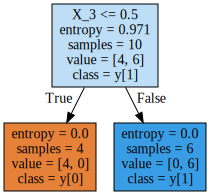

In [34]:
graph = Source(tree.export_graphviz(clf2, out_file=None,
    feature_names=list(X2),
    class_names=True,
    filled=True))
display(SVG(graph.pipe(format='svg')))

In [14]:
start_entropy=-(4/10)*np.log2(4/10)-(6/10*np.log2(6/10))
start_entropy

0.9709505944546686

In [15]:
sherst_dog=(1/1)*np.log2((1/1)) - 0
sherst_dog

0.0

In [16]:
sherst_cat=-(4/9)*np.log2((4/9)) - (5/9)*np.log2((5/9))
sherst_cat

0.9910760598382222

In [17]:
laet_dog=0 - (5/5)*np.log2((5/5))
laet_dog

0.0

In [18]:
laet_cat=-(4/5)*np.log2((4/5)) - (1/5)*np.log2((1/5))
laet_cat

0.7219280948873623

In [19]:
lazaet_dog=0 - (6/6)*np.log2((6/6))
lazaet_dog

0.0

In [20]:
lazaet_cat=-(4/4)*np.log2((4/4)) - 0
lazaet_cat

-0.0

In [21]:
E=(4/10)*np.log2(4/10) - (6/10)*np.log2(6/10)
E

-0.08659188145522112

Посчитаем Information Gain по данным из предыдущего задания. Впишите через пробел округлённые до 2-ого знака значения IG для фичей Шерстист, Гавкает и Лазает по деревьям. Десятичным разделителем в данном задании является точка.

In [22]:
IG_sherst=start_entropy-(1/10*sherst_dog)-(9/10*sherst_cat)
IG_sherst

0.07898214060026854

In [23]:
IG_laet=start_entropy-(5/10*laet_dog)-(5/10*laet_cat)
IG_laet

0.6099865470109874

In [24]:
IG_lazaet=start_entropy-(4/10*lazaet_dog)-(6/10*lazaet_cat)
IG_lazaet

0.9709505944546686